<a href="https://colab.research.google.com/github/mosahle7/ML/blob/main/Image_Compression_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d 'rahulogoel/some-random-png-files'

Dataset URL: https://www.kaggle.com/datasets/rahulogoel/some-random-png-files
License(s): MIT
 56% 8.00M/14.2M [00:00<00:00, 83.4MB/s]
100% 14.2M/14.2M [00:00<00:00, 106MB/s] 


In [2]:
import zipfile
zip_ref=zipfile.ZipFile('/content/some-random-png-files.zip','r')
zip_ref.extractall('/content/png-files')
zip_ref.close()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
og_img = plt.imread('/content/png-files/assets/macaw_bird.png')

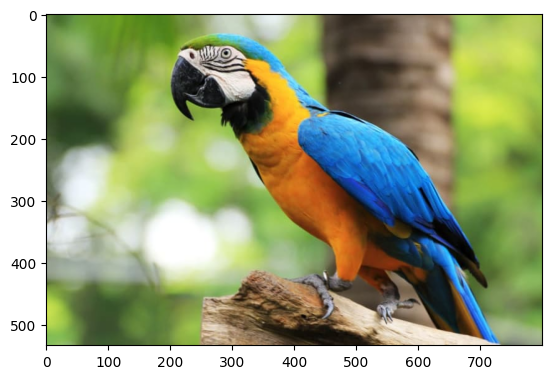

In [5]:
plt.imshow(og_img)

In [6]:
print("Shape of original image: ",og_img.shape)

Shape of original image:  (534, 800, 3)


In [7]:
X_img = np.reshape(og_img, (og_img.shape[0]*og_img.shape[1],3))

In [8]:
K = 16
max_iters = 10

In [16]:
def init_centroids(X, K):
  randidx = np.random.permutation(X.shape[0])
  centroids = X[randidx[:K]]
  return centroids

In [32]:
def closest_centroids(X, centroids, K):
  m, n = X.shape
  cent_idx = np.zeros(m)
  for i in range(m):
    m = float('inf')
    for j in range(K):
      dis = np.linalg.norm(X[i]-centroids[j])
      if dis<m:
        m = dis
        cent_idx[i] = j
  return cent_idx


In [34]:
def closest_centroids(X, centroids, K):
  distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
  cent_idx = np.argmin(distances, axis=1)  # (m,)
  return cent_idx


In [39]:
def compute_centroids(X, cent_idx, K):
  m, n = X.shape
  centroids = np.zeros((K,n))
  count = np.zeros(K)
  for i in range(m):
    centroids[cent_idx[i]]+=X[i]
    count[cent_idx[i]]+=1

  for j in range(K):
    centroids[j]/=count[j]

  return centroids



In [42]:
def compute_centroids(X, cent_idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    count = np.bincount(cent_idx, minlength=K).reshape(K, 1)  # Count occurrences of each cluster

    # Sum all points belonging to each cluster
    np.add.at(centroids, cent_idx, X)

    # Avoid division by zero (replace zeros with ones for safe division)
    count[count == 0] = 1
    centroids /= count  # Element-wise division

    return centroids


In [40]:
centroids = init_centroids(X_img, K)
cent_idx = closest_centroids(X_img, centroids, K)
compute_centroids(X_img, cent_idx, K)

array([[0.40756882, 0.46671654, 0.29835317],
       [0.5427305 , 0.68331701, 0.31228601],
       [0.68529485, 0.46678223, 0.26094054],
       [0.79466694, 0.84600896, 0.45919586],
       [0.70957689, 0.79324243, 0.47406097],
       [0.31947167, 0.44085647, 0.19248763],
       [0.75432588, 0.81357918, 0.31782835],
       [0.16200327, 0.51846043, 0.82920151],
       [0.4299921 , 0.29411662, 0.1763939 ],
       [0.4562027 , 0.58476718, 0.2687009 ],
       [0.0976663 , 0.09765327, 0.08892418],
       [0.22212928, 0.22067785, 0.17860117],
       [0.91684738, 0.92729057, 0.9021148 ],
       [0.64994061, 0.67855414, 0.58858848],
       [0.81849416, 0.84598214, 0.72036594],
       [0.6314944 , 0.7684342 , 0.34039592]])

In [43]:
compute_centroids(X_img, cent_idx, K)

array([[0.40756882, 0.46671654, 0.29835317],
       [0.5427305 , 0.68331701, 0.31228601],
       [0.68529485, 0.46678223, 0.26094054],
       [0.79466694, 0.84600896, 0.45919586],
       [0.70957689, 0.79324243, 0.47406097],
       [0.31947167, 0.44085647, 0.19248763],
       [0.75432588, 0.81357918, 0.31782835],
       [0.16200327, 0.51846043, 0.82920151],
       [0.4299921 , 0.29411662, 0.1763939 ],
       [0.4562027 , 0.58476718, 0.2687009 ],
       [0.0976663 , 0.09765327, 0.08892418],
       [0.22212928, 0.22067785, 0.17860117],
       [0.91684738, 0.92729057, 0.9021148 ],
       [0.64994061, 0.67855414, 0.58858848],
       [0.81849416, 0.84598214, 0.72036594],
       [0.6314944 , 0.7684342 , 0.34039592]])

In [36]:
print(cent_idx)

[12 12 12 ... 15 15 15]


(427200, 3)